<a href="https://colab.research.google.com/github/vfabianfarias/Telecom-X-Alura/blob/main/Telecom_X_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción(E - Extract)

## Extracción de datos

In [70]:
import requests
import json

# URL de la API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Solicitud a la API
response = requests.get(url)

# Convertir a JSON
data = response.json()

# Ver estructura inicial
print(type(data))
print(len(data))
print(data[0])  # primer registro para verificar

<class 'list'>
7267
{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}


In [71]:
import pandas as pd

# Convertir los datos JSON a un DataFrame
df = pd.DataFrame(data)

# Mostrar la forma y las primeras filas
print("Filas y columnas:", df.shape)
df.head()

Filas y columnas: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Transformación (T - Transform)

## Conoce el conjunto de datos

In [72]:
# Expandir las columnas que contienen diccionarios en nuevas columnas
df_expanded = pd.json_normalize(data)

In [73]:
# Ver nombres de columnas y tipos de datos
print("Columnas del DataFrame:")
print(df_expanded.dtypes)

Columnas del DataFrame:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [74]:
# Revisar los nombres de columnas disponibles como "diccionario"
print("Diccionario de variables:")
for col in df_expanded.columns:
    print(f"- {col}")

Diccionario de variables:
- customerID
- Churn
- customer.gender
- customer.SeniorCitizen
- customer.Partner
- customer.Dependents
- customer.tenure
- phone.PhoneService
- phone.MultipleLines
- internet.InternetService
- internet.OnlineSecurity
- internet.OnlineBackup
- internet.DeviceProtection
- internet.TechSupport
- internet.StreamingTV
- internet.StreamingMovies
- account.Contract
- account.PaperlessBilling
- account.PaymentMethod
- account.Charges.Monthly
- account.Charges.Total


In [75]:
# Revisar estructura general con df.info()
print("Estructura del DataFrame:")
df_expanded.info()

Estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport  

In [76]:
# Las columnas numéricas y categóricas
print("\nTipos de datos por columna:")
print(df_expanded.dtypes)


Tipos de datos por columna:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


## Comprobación de incoherencias en los datos

In [77]:
# Resumen en forma de diccionario
resumen_nulos_vacios = {
    col: {
        "nulos": int(df_expanded[col].isna().sum()),
        "vacios": int((df_expanded[col] == "").sum()) if df_expanded[col].dtype == "object" else 0
    }
    for col in df_expanded.columns
}

import pandas as pd
pd.DataFrame(resumen_nulos_vacios).T

,nulos,vacios
customerID,0,0
Churn,0,224
customer.gender,0,0
customer.SeniorCitizen,0,0
customer.Partner,0,0
customer.Dependents,0,0
customer.tenure,0,0
phone.PhoneService,0,0
phone.MultipleLines,0,0
internet.InternetService,0,0


In [78]:
# Listar valores únicos incluyendo vacíos explícitamente
print("\nValores únicos por columna (después de expandir diccionarios):")
for col in df_expanded.select_dtypes(include=["object"]).columns:
    print(f"\nColumna: {col}")
    print(df_expanded[col].unique())


Valores únicos por columna (después de expandir diccionarios):

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: customer.gender
['Female' 'Male']

Columna: customer.Partner
['Yes' 'No']

Columna: customer.Dependents
['Yes' 'No']

Columna: phone.PhoneService
['Yes' 'No']

Columna: phone.MultipleLines
['No' 'Yes' 'No phone service']

Columna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Columna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

Columna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

Columna: internet.TechSupport
['Yes' 'No' 'No internet service']

Columna: internet.StreamingTV
['Yes' 'No' 'No internet service']

Columna: internet.StreamingMovies
['No' 'Yes' 'No internet service']

Columna: account.Contract
['One year' 'Month-to-month' 'Two year']

Columna: account.PaperlessB

## Manejo de inconsistencias

In [79]:
# Normalizar nombres de columnas: solo minúsculas (manteniendo los puntos)
df_expanded.columns = [col.lower() for col in df_expanded.columns]

print("Columnas normalizadas:")
print(df_expanded.columns.tolist())

Columnas normalizadas:
['customerid', 'churn', 'customer.gender', 'customer.seniorcitizen', 'customer.partner', 'customer.dependents', 'customer.tenure', 'phone.phoneservice', 'phone.multiplelines', 'internet.internetservice', 'internet.onlinesecurity', 'internet.onlinebackup', 'internet.deviceprotection', 'internet.techsupport', 'internet.streamingtv', 'internet.streamingmovies', 'account.contract', 'account.paperlessbilling', 'account.paymentmethod', 'account.charges.monthly', 'account.charges.total']


## Estandarización y transformación de datos

In [80]:
import pandas as pd
import numpy as np

# Función de normalización binaria simple
def mapear_binario(serie):
    serie = serie.fillna("").astype(str).str.strip().str.lower()
    mapeo = {
        "yes": 1, "si": 1, "true": 1, "1": 1,
        "no": 0, "false": 0, "0": 0,
        "": -1, "nan": -1
    }
    return serie.map(lambda x: mapeo.get(x, -1))

# Columnas que se convierten a 0/1/-1
binarias = [
    "churn",
    "customer.partner",
    "customer.seniorcitizen",
    "customer.dependents",
    "phone.phoneservice",
    "account.paperlessbilling"
]

for col in binarias:
    if col in df_expanded.columns:
        df_expanded[col] = mapear_binario(df_expanded[col])

print("Conversión aplicada a columnas binarias.")
print(df_expanded[binarias].head(10))

Conversión aplicada a columnas binarias.
   churn  customer.partner  customer.seniorcitizen  customer.dependents  \
0      0                 1                       0                    1   
1      0                 0                       0                    0   
2      1                 0                       0                    0   
3      1                 1                       1                    0   
4      1                 1                       1                    0   
5      0                 0                       0                    1   
6      0                 1                       1                    0   
7      0                 1                       0                    0   
8      0                 0                       1                    0   
9      0                 1                       0                    1   

   phone.phoneservice  account.paperlessbilling  
0                   1                         1  
1                   1            

In [81]:
# Traducción de nombres de columnas
traduccion_columnas = {
    "customerid": "id_cliente",
    "churn": "cancelacion",
    "customer.gender": "cliente.genero",
    "customer.seniorcitizen": "cliente.ciudadano_senior",
    "customer.partner": "cliente.pareja",
    "customer.dependents": "cliente.dependientes",
    "customer.tenure": "cliente.antiguedad",
    "phone.phoneservice": "telefono.servicio_telefonico",
    "phone.multiplelines": "telefono.lineas_multiples",
    "internet.internetservice": "internet.servicio_internet",
    "internet.onlinesecurity": "internet.seguridad_en_linea",
    "internet.onlinebackup": "internet.copia_seguridad",
    "internet.deviceprotection": "internet.proteccion_dispositivo",
    "internet.techsupport": "internet.soporte_tecnico",
    "internet.streamingtv": "internet.tv_streaming",
    "internet.streamingmovies": "internet.peliculas_streaming",
    "account.contract": "cuenta.contrato",
    "account.paperlessbilling": "cuenta.facturacion_sin_papel",
    "account.paymentmethod": "cuenta.metodo_pago",
    "account.charges.monthly": "cuenta.cargos_mensuales",
    "account.charges.total": "cuenta.cargos_totales"
}

df_expanded = df_expanded.rename(columns=traduccion_columnas)

# Traducción de valores
traduccion_valores = {
    "Yes": "Si",
    "No": "No",
    "Female": "Mujer",
    "Male": "Hombre",
    "No phone service": "Sin servicio telefonico",
    "No internet service": "Sin servicio de internet",
    "DSL": "DSL",
    "Fiber optic": "Fibra optica",
    "Month-to-month": "Mes a mes",
    "One year": "Un año",
    "Two year": "Dos años",
    "Electronic check": "Cheque electronico",
    "Mailed check": "Cheque por correo",
    "Credit card (automatic)": "Tarjeta de credito (automatica)",
    "Bank transfer (automatic)": "Transferencia bancaria (automatica)"
}

# Aplicar traducciones a todas las columnas de tipo "object"
for col in df_expanded.select_dtypes(include=["object"]).columns:
    df_expanded[col] = df_expanded[col].replace(traduccion_valores)

print("Traducción aplicada. Vista previa:")
print(df_expanded.head(3))

Traducción aplicada. Vista previa:
   id_cliente  cancelacion cliente.genero  cliente.ciudadano_senior  \
0  0002-ORFBO            0          Mujer                         0   
1  0003-MKNFE            0         Hombre                         0   
2  0004-TLHLJ            1         Hombre                         0   

   cliente.pareja  cliente.dependientes  cliente.antiguedad  \
0               1                     1                   9   
1               0                     0                   9   
2               0                     0                   4   

   telefono.servicio_telefonico telefono.lineas_multiples  \
0                             1                        No   
1                             1                        Si   
2                             1                        No   

  internet.servicio_internet  ... internet.copia_seguridad  \
0                        DSL  ...                       Si   
1                        DSL  ...                       No

## Columna de cuentas diarias

In [82]:
# Crear la columna 'cuenta.cuentas_diarias' a partir de 'cuenta.cargos_mensuales'
df_expanded["cuenta.cuentas_diarias"] = df_expanded["cuenta.cargos_mensuales"] / 30

print("Columna 'cuenta.cuentas_diarias' creada exitosamente.")
print(df_expanded[["cuenta.cargos_mensuales", "cuenta.cuentas_diarias"]].head(10))

Columna 'cuenta.cuentas_diarias' creada exitosamente.
   cuenta.cargos_mensuales  cuenta.cuentas_diarias
0                    65.60                2.186667
1                    59.90                1.996667
2                    73.90                2.463333
3                    98.00                3.266667
4                    83.90                2.796667
5                    69.40                2.313333
6                   109.70                3.656667
7                    84.65                2.821667
8                    48.20                1.606667
9                    90.45                3.015000


# Carga y análisis(L - Load & Analysis)

In [83]:
print("\nAnálisis descriptivo de las variables categóricas:\n")
print(df_expanded.describe(include=["object"]))


Análisis descriptivo de las variables categóricas:

        id_cliente cliente.genero telefono.lineas_multiples  \
count         7267           7267                      7267   
unique        7267              2                         3   
top     9995-HOTOH         Hombre                        No   
freq             1           3675                      3495   

       internet.servicio_internet internet.seguridad_en_linea  \
count                        7267                        7267   
unique                          3                           3   
top                  Fibra optica                          No   
freq                         3198                        3608   

       internet.copia_seguridad internet.proteccion_dispositivo  \
count                      7267                            7267   
unique                        3                               3   
top                          No                              No   
freq                       3182      

In [84]:
# Análisis descriptivo de las variables numéricas
print("Análisis descriptivo de los datos numéricos:\n")
print(df_expanded.describe())

Análisis descriptivo de los datos numéricos:

       cancelacion  cliente.ciudadano_senior  cliente.pareja  \
count  7267.000000               7267.000000     7267.000000   
mean      0.226366                  0.162653        0.484106   
std       0.486627                  0.369074        0.499782   
min      -1.000000                  0.000000        0.000000   
25%       0.000000                  0.000000        0.000000   
50%       0.000000                  0.000000        0.000000   
75%       1.000000                  0.000000        1.000000   
max       1.000000                  1.000000        1.000000   

       cliente.dependientes  cliente.antiguedad  telefono.servicio_telefonico  \
count           7267.000000         7267.000000                   7267.000000   
mean               0.300124           32.346498                      0.902711   
std                0.458343           24.571773                      0.296371   
min                0.000000            0.000000      

## Distribución de evasión

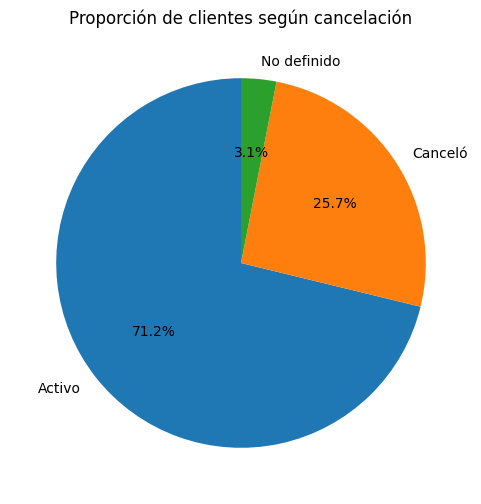

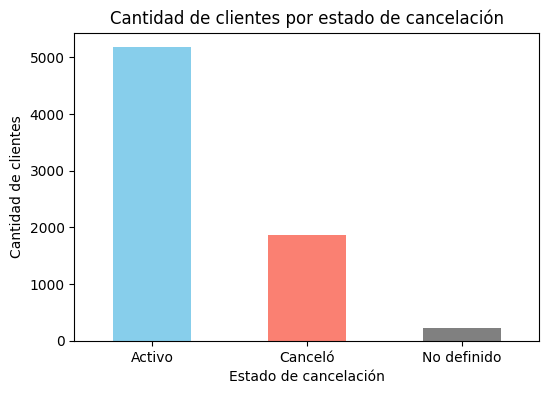

In [85]:
import matplotlib.pyplot as plt

# Mapear valores numéricos a etiquetas
etiquetas = {0: "Activo", 1: "Canceló", -1: "No definido"}
conteo_cancelacion = df_expanded["cancelacion"].map(etiquetas).value_counts()

# Gráfico circular
plt.figure(figsize=(6, 6))
conteo_cancelacion.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporción de clientes según cancelación")
plt.ylabel("")
plt.show()

# Gráfico de barras
plt.figure(figsize=(6, 4))
conteo_cancelacion.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])
plt.title("Cantidad de clientes por estado de cancelación")
plt.xlabel("Estado de cancelación")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.show()

## Recuento de evasión por variables categóricas

<Figure size 900x600 with 0 Axes>

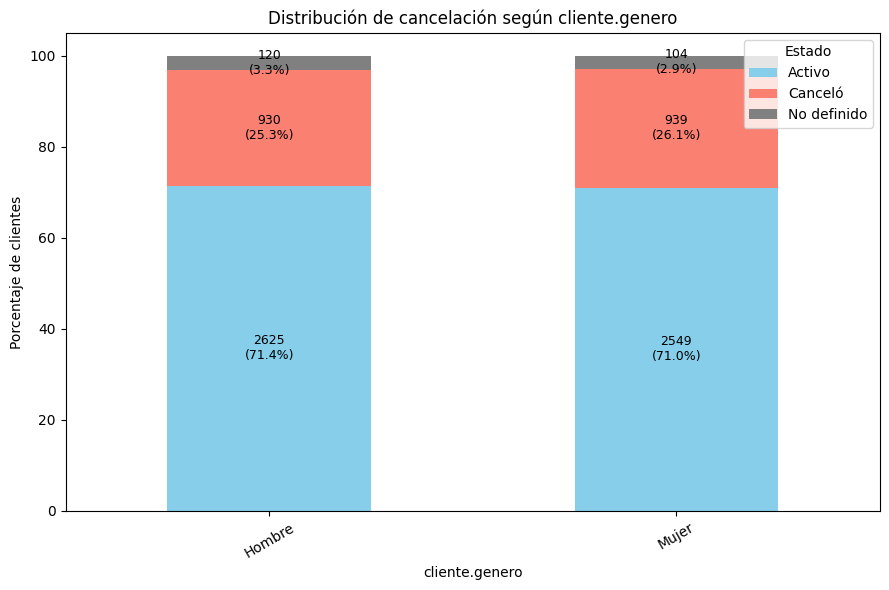

<Figure size 900x600 with 0 Axes>

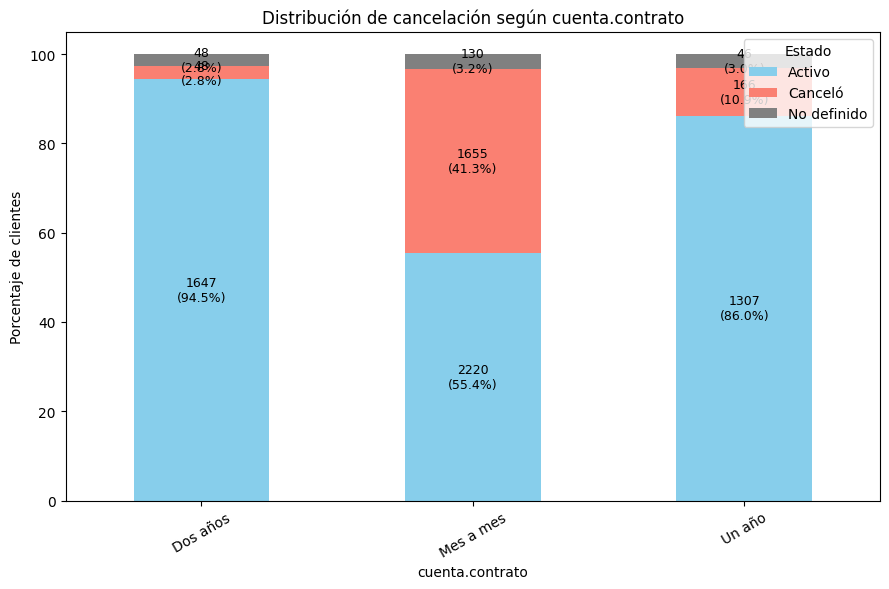

<Figure size 900x600 with 0 Axes>

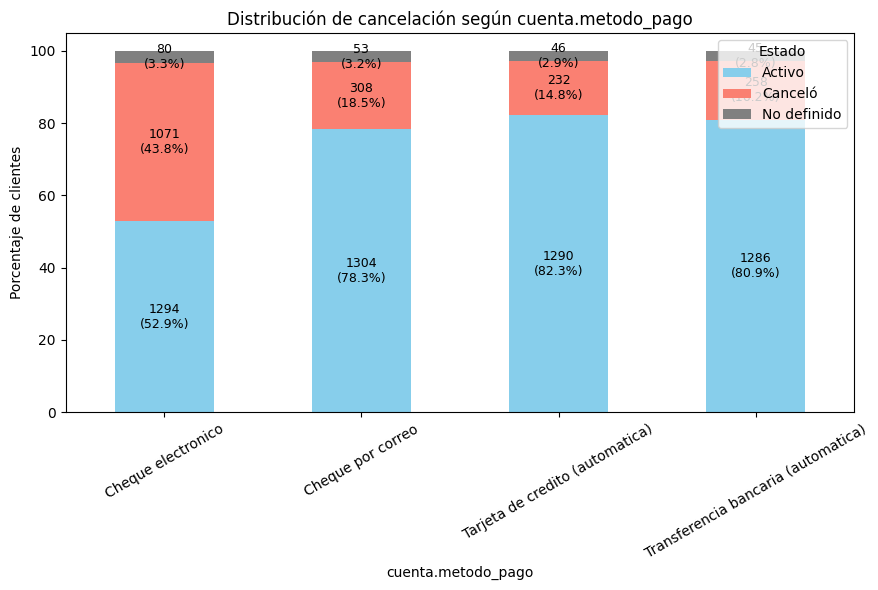

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas para el análisis de cancelación
categoricas = [
    "cliente.genero",
    "cuenta.contrato",
    "cuenta.metodo_pago"
]

# Reemplazar etiquetas de cancelación
etiquetas_cancelacion = {0: "Activo", 1: "Canceló", -1: "No definido"}

for col in categoricas:
    plt.figure(figsize=(9, 6))

    # Tabla cruzada con conteo absoluto
    conteo = pd.crosstab(
        df_expanded[col],
        df_expanded["cancelacion"].map(etiquetas_cancelacion)
    )

    # Tabla cruzada con porcentaje (normalizado por fila)
    porcentaje = pd.crosstab(
        df_expanded[col],
        df_expanded["cancelacion"].map(etiquetas_cancelacion),
        normalize="index"
    ) * 100

    # Graficar porcentajes
    ax = porcentaje.plot(
        kind="bar", stacked=True,
        color=["skyblue", "salmon", "gray"],
        figsize=(9,6)
    )

    # Agregar etiquetas de número de clientes dentro de cada barra
    for i, categoria in enumerate(porcentaje.index):
        acumulado = 0
        for estado in porcentaje.columns:
            valor_abs = conteo.loc[categoria, estado]
            valor_pct = porcentaje.loc[categoria, estado]
            if valor_abs > 0:
                ax.text(
                    i, acumulado + valor_pct/2,
                    f"{valor_abs}\n({valor_pct:.1f}%)",
                    ha="center", va="center", fontsize=9, color="black"
                )
            acumulado += valor_pct

    plt.title(f"Distribución de cancelación según {col}")
    plt.xlabel(col)
    plt.ylabel("Porcentaje de clientes")
    plt.legend(title="Estado", loc="upper right")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


## Conteo de evasión por variables numéricas

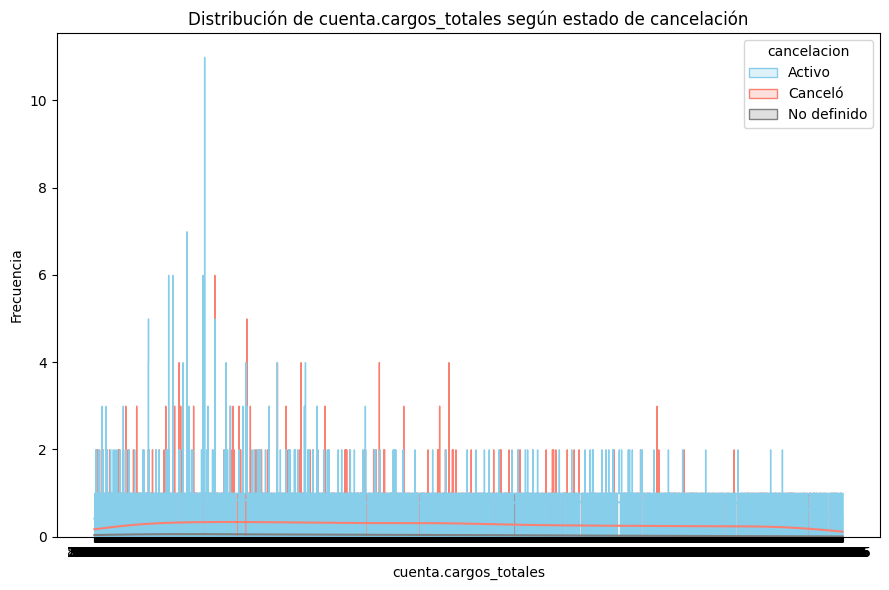

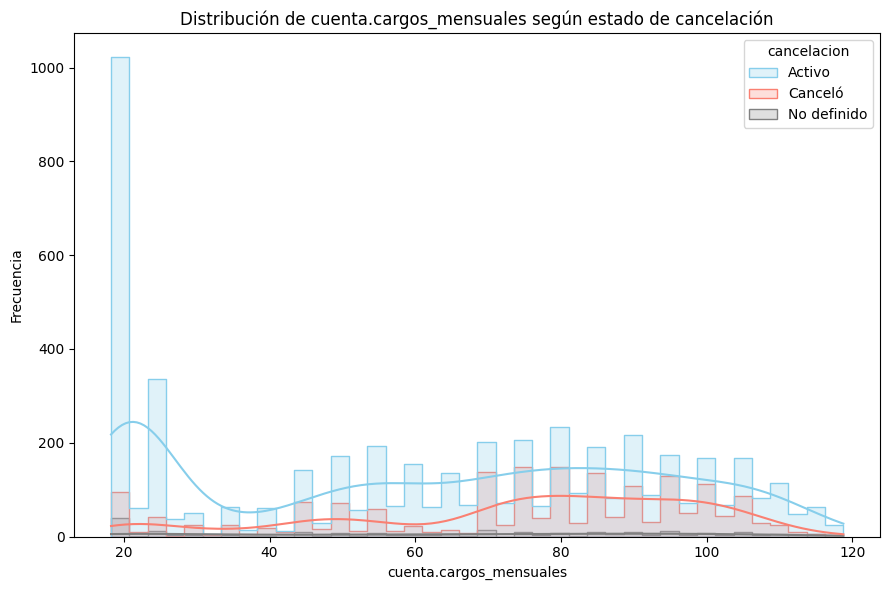

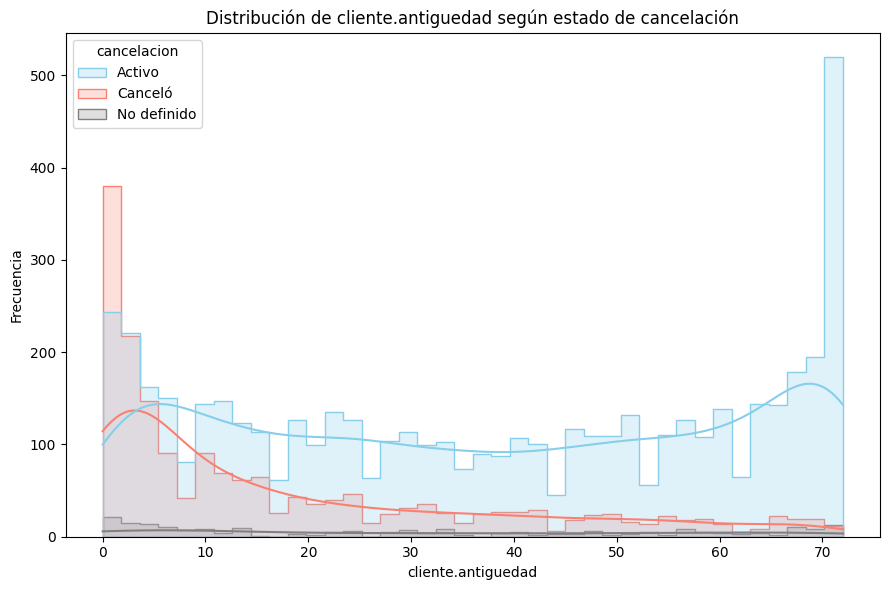

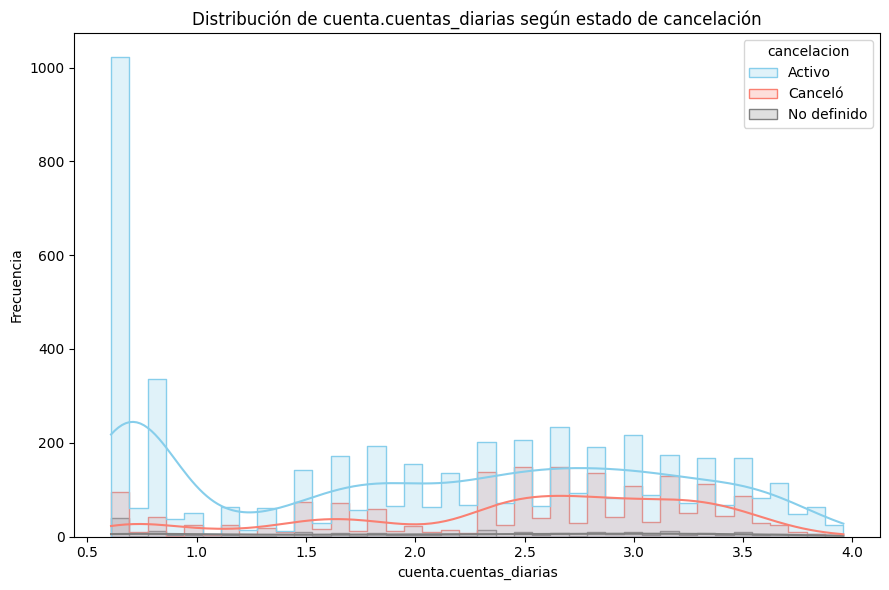

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = [
    "cuenta.cargos_totales",
    "cuenta.cargos_mensuales",
    "cliente.antiguedad",
    "cuenta.cuentas_diarias"
]

etiquetas_cancelacion = {0: "Activo", 1: "Canceló", -1: "No definido"}

for col in numericas:
    plt.figure(figsize=(9,6))
    sns.histplot(
        data=df_expanded,
        x=col,
        hue=df_expanded["cancelacion"].map(etiquetas_cancelacion),
        kde=True,
        bins=40,
        palette={"Activo": "skyblue", "Canceló": "salmon", "No definido": "gray"},
        element="step"
    )
    plt.title(f"Distribución de {col} según estado de cancelación")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

In [99]:
# Asegurar que los cargos sean numéricos
df_expanded["cuenta.cargos_totales"] = pd.to_numeric(
    df_expanded["cuenta.cargos_totales"], errors="coerce"
)
df_expanded["cuenta.cargos_mensuales"] = pd.to_numeric(
    df_expanded["cuenta.cargos_mensuales"], errors="coerce"
)

# Mapear etiquetas legibles de cancelación
etiquetas_cancelacion = {0: "Activo", 1: "Canceló", -1: "No definido"}
df_temp = df_expanded.copy()
df_temp["cancelacion"] = df_temp["cancelacion"].map(etiquetas_cancelacion)

# Columnas numéricas relevantes
numericas = [
    "cuenta.cargos_totales",
    "cuenta.cargos_mensuales",
    "cliente.antiguedad",
    "cuenta.cuentas_diarias"
]

# Agrupar y calcular estadísticas
comparacion = df_temp.groupby("cancelacion")[numericas].agg(
    ["mean", "median", "std", "min", "max"]
).round(2)

print(comparacion)

            cuenta.cargos_totales                                    \
                             mean   median      std    min      max   
cancelacion                                                           
Activo                    2555.34  1683.60  2329.46  18.80  8672.45   
Canceló                   1531.80   703.55  1890.82  18.85  8684.80   
No definido               2196.93  1163.18  2329.96  18.90  8425.30   

            cuenta.cargos_mensuales                               \
                               mean median    std    min     max   
cancelacion                                                        
Activo                        61.27  64.43  31.09  18.25  118.75   
Canceló                       74.44  79.65  24.67  18.85  118.35   
No definido                   63.41  69.10  31.39  18.75  115.55   

            cliente.antiguedad                       cuenta.cuentas_diarias  \
                          mean median    std min max                   mean   
cancel